In [2]:
cd /content/drive/MyDrive/스킨푸드

/content/drive/MyDrive/스킨푸드


In [3]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import urllib.request

In [4]:
def search(keyword,display,start):
    url="	https://openapi.naver.com/v1/search/kin.json?query="+keyword
    url+="&display="+str(display)+"&start="+str(start)
    headers={"X-Naver-Client-Id":"27Ajj0rHmLFO5d5Mxfsb", 
             "X-Naver-Client-Secret":"tO8tLDsUr5"}
    res=requests.get(url,headers=headers)
    if res.status_code==200:
      return res.json()
    else:
      return
    

In [5]:
keyword=input("키워드를 입력하세요:")
data=[]

txts=open('/content/drive/MyDrive/스킨푸드/data/'+keyword+'.txt','w')
for i in range(1,1000,100):
    items=search(keyword,100,i)['items']
    for j in items:
        tit=j['title'].replace('<b>','').replace('</b>','')
        dsc=j['description'].replace('<b>','').replace('</b>','').replace('... ','')
        txts.write(tit+': '+dsc+'\n')
        data.append([tit,dsc])
df1=pd.DataFrame(data,columns=['제목','내용'])
display(df1)


키워드를 입력하세요:유아썬크림


,제목,내용
0,유아썬크림 골라주세요,유아썬크림 알아보는데 종류가 너무 많네요 괜찮은 유아썬크림 아시는거 있으면 추천 부...
1,유아선크림 중 순한 유아썬크림추천 받아요,올해 4살 딸을 두고 있는 엄마에요 여름맞이 유아선크림 알아보는중인데 맘카페 통해 ...
2,유아썬크림 순한걸로 좀 알려주세요~,유아썬크림 순한걸로 좀 알려주세요~ 유아썬 안녕하세요~^^ 찾으시는 유아썬크림 찾...
3,유아썬크림 중 피부에 안전한 선블록 있을까요?,선블록 중에서 유아썬크림 알아보고 있는데 어떤 유아썬크림이 좋을지 모르겠던데.. 엄...
4,유아썬크림클렌징 해줘도 될까요?,썬크림 발라줄때는 편하고 좋았는데 아무래도 씻겨주는게 영 고민이더라구요ㅠㅠ 그냥 물...
...,...,...
589,여드름용천연화장품 알려주세영~,아기들 유아전용 로션으로 나온것이기 때문에 유해성분 없구요. 대부분 무첨가해도 7가...
590,아토피 미치겠어요 살려주세요,미백 썬크림은 잘 바르지 않아요 근데 딱 다른 곳도 아닌 눈 밑에 있짆아요 그 부분...
591,중1화장품...,뿌르베베가 아기를 위하여란 제품으로 유아전용 베이비로션 같은거예요. 그런데 다른 베...
592,케리비안베이 급해요!,유아는 따로 준비) 수영복만 입은채로 장시간 야외에서 시간을 보내게되므로 썬크림을꼭...


In [6]:
!pip install konlpy

In [7]:
from konlpy.tag import Okt
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
import os
fdir='./data/'
fname=os.listdir(fdir)
print(fname)

f=open(fdir+fname[0],'r')
word_text=f.read()
okt=Okt()

['아이썬크림.txt', '어린이썬크림.txt', '유아썬크림.txt', '.txt']


In [9]:
wt=okt.pos(word_text)

wt_lst=[]
for i in wt:
    if i[1]=='Noun' or i[1]=='Adjective' or i[1]=='Adverb':
      wt_lst.append(i[0])
print(len(wt_lst))

30059


### 텍스트에서 키워드 추출

In [62]:
search_keyword=['순한','기능','자극','차단','자외선','성분','여름',
                '햇빛','천연','트러블','지수','아토피','시림','민감한','유기농','화학','외출','발림','보습',
                '지성','좋은','세안']

In [63]:
word_txt=nltk.Text(wt_lst)


In [64]:
wt=[txt for txt in word_txt if txt in search_keyword]
count=Counter(wt)
rank_cnt=count.most_common()
for i in rank_cnt: print(i)

rank_dic=dict(rank_cnt)

('좋은', 177)
('성분', 175)
('자외선', 138)
('자극', 136)
('차단', 120)
('순한', 95)
('여름', 90)
('기능', 67)
('세안', 55)
('햇빛', 48)
('천연', 46)
('트러블', 45)
('지수', 45)
('아토피', 36)
('시림', 36)
('유기농', 33)
('민감한', 31)
('화학', 29)
('발림', 28)
('외출', 27)
('보습', 20)
('지성', 20)


### Word Cloud

In [65]:
!pip install wordCloud
# 글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


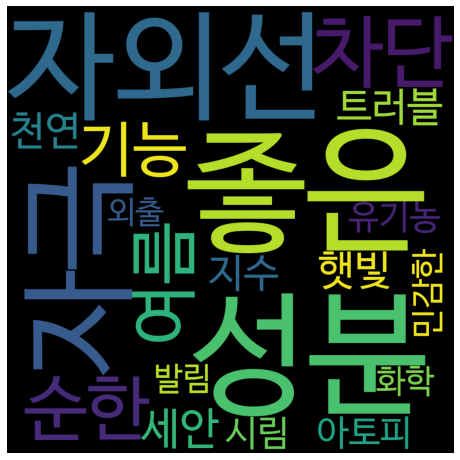

In [66]:
#matplotlib 한글 폰트 오류 문제 해결
from matplotlib import rc
font=rc('font',family='NanumBarunGothic')

wc=WordCloud(font_path="NanumBarunGothic",
             background_color="black",width=1000,height=1000,
             max_words=20,max_font_size=300).generate_from_frequencies(rank_dic)
plt.figure(figsize=(8,15))
plt.imshow(wc)
plt.axis("off")
plt.show()

### 주요 키워드(유아썬크림,어린이썬크림,아이썬크림)

In [67]:
rank_cnt2=count.most_common(20)
keyword_rank=pd.DataFrame(rank_cnt2,columns=['단어','빈도수'])
keyword_rank.to_csv("/content/drive/MyDrive/스킨푸드/data/keyword_rank.csv")
display(keyword_rank)

,단어,빈도수
0,좋은,177
1,성분,175
2,자외선,138
3,자극,136
4,차단,120
5,순한,95
6,여름,90
7,기능,67
8,세안,55
9,햇빛,48


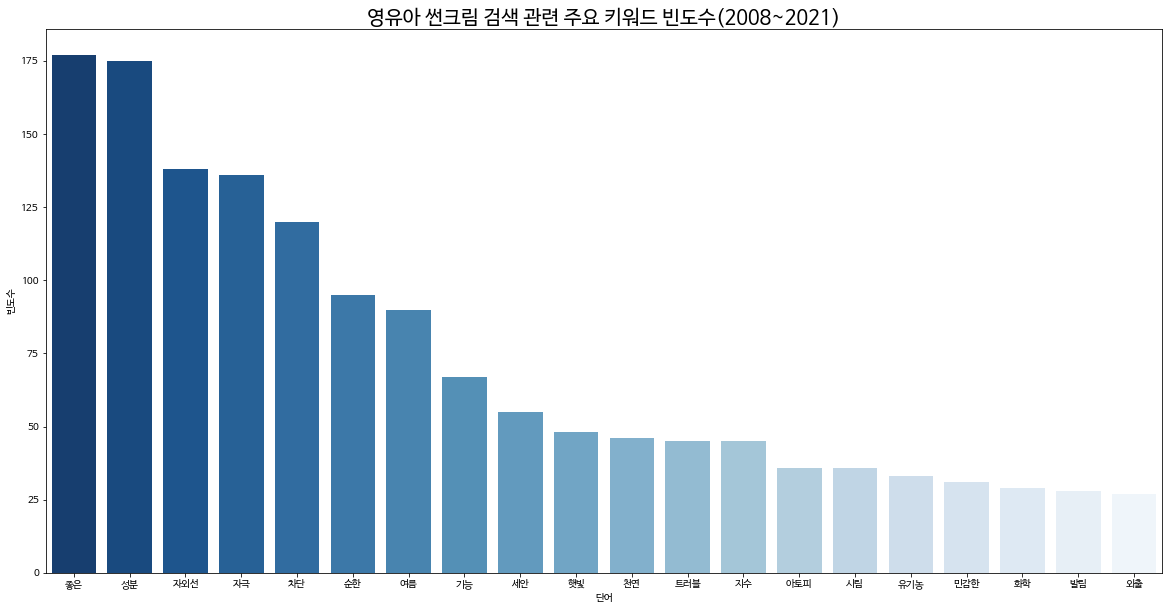

In [68]:
import seaborn as sns

df_sel=pd.DataFrame(rank_cnt,columns=['단어','빈도수'])
df_=df_sel.pivot_table(index='단어',values='빈도수').sort_values(by='빈도수',ascending=False)
font=rc('font',family='NanumBarunGothic')
plt.figure(figsize=(20,10))
h=sns.barplot(data=keyword_rank,x='단어',y='빈도수',palette='Blues_r')
h.set_title('영유아 썬크림 검색 관련 주요 키워드 빈도수(2008~2021)',size=20)
plt.savefig('keyword_rank.png')
